# Import Library

In [2]:
import numpy as np
import pandas as pd
import sqlalchemy as db
from tqdm.notebook import tqdm
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [3]:
load_dotenv()

True

In [62]:
pd.options.display.max_columns = 500

# Load Dataset

The dataset is obtained from [Kaggle](https://www.kaggle.com/abecklas/fifa-world-cup) containing about information of FIFA World Cup each year, the matches and the players playing. These datasets involved all FIFA World Cup matches since 1930 until 2014.

In [4]:
matches = pd.read_csv('Datasets/WorldCupMatches.csv', encoding='utf-8')
matches.sample(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
178,1966.0,15 Jul 1966 - 19:30,Group 3,Goodison Park,Liverpool,Hungary,3.0,1.0,Brazil,,51387.0,1.0,1.0,DAGNALL Kenneth (ENG),HOWLEY Kevin (ENG),YAMASAKI MALDONADO Arturo (MEX),238.0,1597.0,HUN,BRA
2849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,1990.0,07 Jul 1990 - 20:00,Match for third place,Stadio San Nicola,Bari,Italy,2.0,1.0,England,,51426.0,0.0,0.0,QUINIOU Joel (FRA),HANSAL Mohamed (ALG),ROETHLISBERGER Kurt (SUI),3463.0,162.0,ITA,ENG


In [5]:
players = pd.read_csv('Datasets/WorldCupPlayers.csv', encoding='utf-8')
players.sample(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
25018,1025,8784,NED,HIDDINK Guus (NED),S,5,Arthur NUMAN,NaN,Y17' Y76' RSY76'
15049,294,879,FRG,DERWALL Jupp (GER),N,16,Thomas ALLOFS,NaN,NaN
20304,337,3052,ITA,SACCHI Arrigo (ITA),S,4,COSTACURTA,NaN,NaN
10726,262,1953,AUS,RASIC Rale (YUG),S,8,Jimmy MACKAY,NaN,NaN
5241,220,1325,TCH,KOLSKY Karel (TCH),S,16,Jan POPLUHAR,NaN,NaN


In [6]:
info = pd.read_csv('Datasets/WorldCups.csv', encoding='utf-8')
info.sample(5)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
10,1978,Argentina,Argentina,Netherlands,Brazil,Italy,102,16,38,1.545.791
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


# Data Cleaning

In [7]:
all_df = {'matches': matches, 'players': players, 'info': info}

## Drop Null Values

In [8]:
def check_null(name, df):
    print(f'{name} - Percentage of Null Values')
    display(df.isnull().sum() / df.shape[0] * 100)
    print(f'\n{name} - Heatmap of Null Values')
    fig, ax = plt.subplots(figsize=(10, 8))
    g = sns.heatmap(df.isnull(), ax=ax)
    plt.show()

matches - Percentage of Null Values


Year                    81.364829
Datetime                81.364829
Stage                   81.364829
Stadium                 81.364829
City                    81.364829
Home Team Name          81.364829
Home Team Goals         81.364829
Away Team Goals         81.364829
Away Team Name          81.364829
Win conditions          81.364829
Attendance              81.408574
Half-time Home Goals    81.364829
Half-time Away Goals    81.364829
Referee                 81.364829
Assistant 1             81.364829
Assistant 2             81.364829
RoundID                 81.364829
MatchID                 81.364829
Home Team Initials      81.364829
Away Team Initials      81.364829
dtype: float64


matches - Heatmap of Null Values


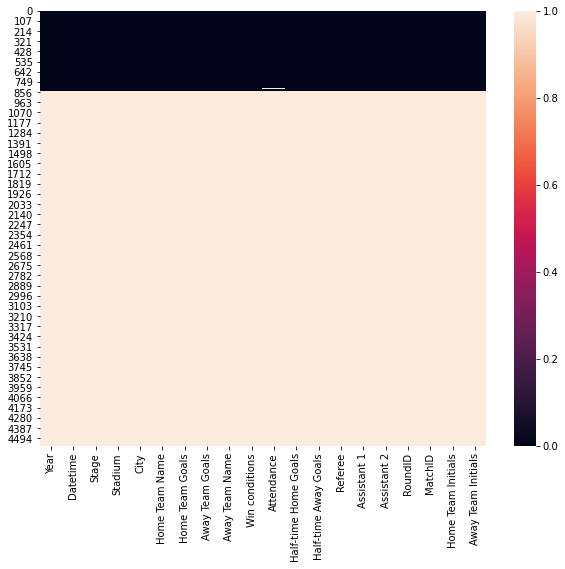

players - Percentage of Null Values


RoundID           0.000000
MatchID           0.000000
Team Initials     0.000000
Coach Name        0.000000
Line-up           0.000000
Shirt Number      0.000000
Player Name       0.000000
Position         89.035041
Event            75.997777
dtype: float64


players - Heatmap of Null Values


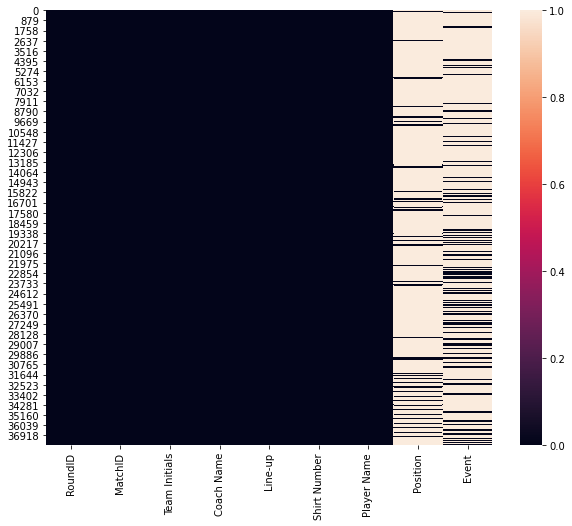

info - Percentage of Null Values


Year              0.0
Country           0.0
Winner            0.0
Runners-Up        0.0
Third             0.0
Fourth            0.0
GoalsScored       0.0
QualifiedTeams    0.0
MatchesPlayed     0.0
Attendance        0.0
dtype: float64


info - Heatmap of Null Values


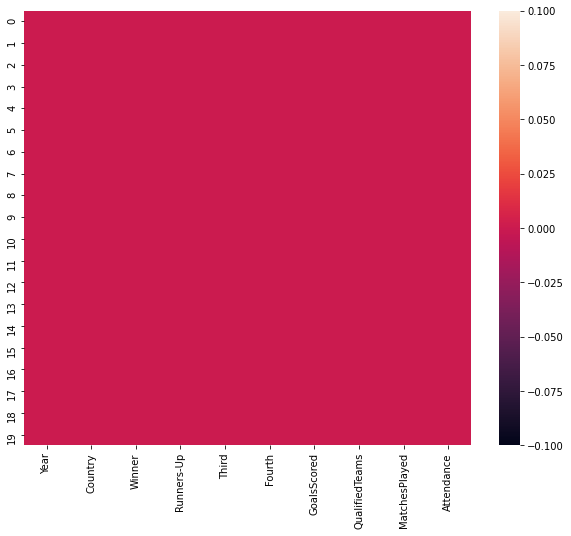

In [9]:
for name, df in all_df.items():
    check_null(name, df)

### `matches`

In [10]:
matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

As shown in the table and heatmap above, there are around 3720 rows with all null values and 2 more missing values in `attendance` column. We'll need to drop these rows, including the 2 more missing values in `attendance` as they will not give any useful information.

In [11]:
matches_clean = matches.dropna()
matches_clean.sample(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
617,2002.0,12 Jun 2002 - 15:30,Group F,Osaka Nagai Stadium,Osaka,Nigeria,0.0,0.0,England,,44864.0,0.0,0.0,HALL Brian (USA),VERGARA Hector (CAN),AMLER Evzen (CZE),43950100.0,43950038.0,NGA,ENG
113,1958.0,11 Jun 1958 - 19:00,Group 4,Ryavallen,Boras,Soviet Union,2.0,0.0,Austria,,21239.0,1.0,0.0,JORGENSEN Carl Frederik (DEN),NILSEN Birger (NOR),ACKEBORN Gosta (SWE),220.0,1332.0,URS,AUT
284,1978.0,07 Jun 1978 - 16:45,Group 4,Estadio Ol�mpico Chateau Carreras,Cordoba,Scotland,1.0,1.0,IR Iran,,7938.0,1.0,0.0,NDIAYE Youssou (SEN),RAINEA Nicolae (ROU),COELHO Arnaldo (BRA),278.0,2408.0,SCO,IRN
551,1998.0,23 Jun 1998 - 21:00,Group A,Stade V�lodrome,Marseilles,Brazil,1.0,2.0,Norway,,55000.0,0.0,0.0,BAHARMAST Esse (USA),MAZZEI Gennaro (ITA),DANTE Dramane (MLI),1014.0,8759.0,BRA,NOR
774,2014.0,13 Jun 2014 - 16:00,Group B,Arena Fonte Nova,Salvador,Spain,1.0,5.0,Netherlands,,48173.0,1.0,1.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255931.0,300186510.0,ESP,NED


In [12]:
matches_clean.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

### `players` and `info`

For `info` dataset, there are no null values in the dataset so we can leave it as it is. Meanwhile, for `players`, there are many null values in `Position` and `Event` column so we'll drop these two columns.

In [13]:
info_clean = info.copy()

In [14]:
players_clean = players.drop(['Position', 'Event'], axis=1)
players_clean.sample(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name
15394,294,877,ENG,GREENWOOD Ron (ENG),N,2,Viv ANDERSON
13638,293,878,FRA,HIDALGO Michel (FRA),N,2,Manuel AMOROS
25419,43950100,43950004,KSA,AL JOHAR Nasser (KSA),S,8,NOOR
33895,249718,300061506,ESP,DEL BOSQUE Vicente (ESP),S,16,SERGIO
9839,569,1838,FRG,SCHOEN Helmut (FRG),S,5,Willi SCHULZ


## Fix Data Types

### `matches`

In [15]:
matches.head(3)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA


In [16]:
matches.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

First, we'll need to fix the numerical columns where currently has float datatype because previously we had null values in those columns

In [17]:
matches_clean.loc[:, matches_clean.select_dtypes('number').columns] = matches_clean.select_dtypes('number').astype(int)
matches_clean.sample(5)

c:\users\zylveyn\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
721,2010,15 Jun 2010 - 20:30,Group G,Ellis Park Stadium,Johannesburg,Brazil,2,1,Korea DPR,,54331,0,0,KASSAI Viktor (HUN),EROS Gabor (HUN),VAMOS Tibor (HUN),249722,300061490,BRA,PRK
312,1982,15 Jun 1982 - 21:00,Group 3,Nuevo Estadio,Elche,Hungary,10,1,El Salvador,,23000,3,0,AL DOY Ebrahim (BHR),CORVER Charles (NED),LUND-SORENSEN Henning (DEN),293,896,HUN,SLV
315,1982,16 Jun 1982 - 17:15,Group 4,San Mames,Bilbao,England,3,1,France,,44172,1,1,GARRIDO Antonio (POR),CASTRO Gaston (CHI),COELHO Arnaldo (BRA),293,878,ENG,FRA
290,1978,11 Jun 1978 - 13:45,Group 3,Estadio Jos� Mar�a Minella,Mar Del Plata,Brazil,1,0,Austria,,35221,1,0,WURTZ Robert (FRA),BOUZO Farouk (SYR),GEBREYESUS DIFUE Tesfaye (ERI),278,2215,BRA,AUT
457,1990,30 Jun 1990 - 21:00,Quarter-finals,Stadio Olimpico,Rome,Italy,1,0,"rn"">Republic of Ireland",,73303,1,0,SILVA VALENTE Carlos Alberto (POR),PEREZ HOYOS Armando (COL),ULLOA MORERA Berny (CRC),751,243,ITA,IRL


Next, we will need to change the Datetime column into appropriate datatype instead of object/string datatype. But, some of the month name are not abbreviated, for example: Jun is written as June. So, we'll need to modify this first.

In [24]:
# Check which records with month name not abbreviated
matches_clean.Datetime[matches_clean.Datetime.apply(len) == 21]

229    17 June 1970 - 16:00 
251    22 June 1974 - 19:30 
269    07 July 1974 - 16:00 
588    03 June 2002 - 18:00 
591    04 June 2002 - 15:30 
592    04 June 2002 - 18:00 
602    07 June 2002 - 18:00 
605    08 June 2002 - 18:00 
613    11 June 2002 - 15:30 
633    17 June 2002 - 15:30 
Name: Datetime, dtype: object

In [28]:
matches_clean['Datetime'] = matches_clean.Datetime.str.replace('June', 'Jun').str.replace('July', 'Jul')
matches_clean

<ipython-input-28-f963b7a89698>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_clean['Datetime'] = matches_clean.Datetime.str.replace('June', 'Jun').str.replace('July', 'Jul')


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED


Then, we will change the datatype to datetime

In [32]:
matches_clean['Datetime'] = matches_clean['Datetime'].apply(lambda x: dt.strptime(x, '%d %b %Y - %H:%M '))
matches_clean

<ipython-input-32-556c9ce372ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_clean['Datetime'] = matches_clean['Datetime'].apply(lambda x: dt.strptime(x, '%d %b %Y - %H:%M '))


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,2014-07-05 17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
848,2014,2014-07-08 17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
849,2014,2014-07-09 17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
850,2014,2014-07-12 17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED


In [33]:
matches_clean.dtypes

Year                             int32
Datetime                datetime64[ns]
Stage                           object
Stadium                         object
City                            object
Home Team Name                  object
Home Team Goals                  int32
Away Team Goals                  int32
Away Team Name                  object
Win conditions                  object
Attendance                       int32
Half-time Home Goals             int32
Half-time Away Goals             int32
Referee                         object
Assistant 1                     object
Assistant 2                     object
RoundID                          int32
MatchID                          int32
Home Team Initials              object
Away Team Initials              object
dtype: object

### `players`

In [34]:
players.head(3)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'


In [35]:
players.dtypes

RoundID           int64
MatchID           int64
Team Initials    object
Coach Name       object
Line-up          object
Shirt Number      int64
Player Name      object
Position         object
Event            object
dtype: object

`players` dataset already has correct datatypes so it will not further processing

In [36]:
players_clean = players.copy()
players_clean.sample(5)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37691,255955,300186490,ARG,SABELLA Alejandro (ARG),N,7,DI MARIA,NaN,NaN
1755,206,1166,GER,HERBERGER Sepp (FRG),N,0,Rudolf GELLESCH,NaN,NaN
9137,250,1774,FRG,SCHOEN Helmut (FRG),S,4,Franz BECKENBAUER,NaN,O72'
13316,293,749,ARG,MENOTTI Cesar Luis (ARG),S,8,Luis GALVAN,NaN,NaN
20399,337,3054,MAR,BLINDA Abdellah (MAR),S,6,NAYBET,NaN,Y23'


### `info`

In [37]:
info.head(3)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700


In [38]:
info.dtypes

Year               int64
Country           object
Winner            object
Runners-Up        object
Third             object
Fourth            object
GoalsScored        int64
QualifiedTeams     int64
MatchesPlayed      int64
Attendance        object
dtype: object

For `info` dataset, we'll only need to change the datatype for `Attendance` column into float type

In [39]:
info_clean = info.copy()
info_clean.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [42]:
info_clean['Attendance'] = info_clean['Attendance'].str.replace('.', '').astype(float)
info_clean.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607.0


In [43]:
info_clean.dtypes

Year                int64
Country            object
Winner             object
Runners-Up         object
Third              object
Fourth             object
GoalsScored         int64
QualifiedTeams      int64
MatchesPlayed       int64
Attendance        float64
dtype: object

## Create New Features/Columns

### `matches`

In [64]:
matches_clean[['Referee Country', 'Assistant 1 Country', 'Assistant 2 Country']] = matches_clean[['Referee', 'Assistant 1', 'Assistant 2']].applymap(lambda x: x.split(' (')[-1].replace(')', ''))
matches_clean

c:\users\zylveyn\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Referee Country,Assistant 1 Country,Assistant 2 Country
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,URU,BEL,BRA
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,ARG,URU,CHI
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,URU,URU,FRA
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,CHI,BEL,URU
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,BRA,BOL,ROU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,2014-07-05 17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC,UZB,UZB,KGZ
848,2014,2014-07-08 17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER,MEX,MEX,MEX
849,2014,2014-07-09 17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG,TUR,TUR,TUR
850,2014,2014-07-12 17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED,ALG,MAR,ALG


In [69]:
matches_clean[['Referee', 'Assistant 1', 'Assistant 2']] = matches_clean[['Referee', 'Assistant 1', 'Assistant 2']].applymap(lambda x: x.split(' (')[0])
matches_clean

c:\users\zylveyn\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Referee Country,Assistant 1 Country,Assistant 2 Country
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo,CRISTOPHE Henry,REGO Gilberto,201,1096,FRA,MEX,URU,BEL,BRA
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose,MATEUCCI Francisco,WARNKEN Alberto,201,1090,USA,BEL,ARG,URU,CHI
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal,VALLARINO Ricardo,BALWAY Thomas,201,1093,YUG,BRA,URU,URU,FRA
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto,LANGENUS Jean,MATEUCCI Francisco,201,1098,ROU,PER,CHI,BEL,URU
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto,SAUCEDO Ulises,RADULESCU Constantin,201,1085,ARG,FRA,BRA,BOL,ROU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2014,2014-07-05 17:00:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179,0,0,Ravshan IRMATOV,RASULOV Abduxamidullo,KOCHKAROV Bakhadyr,255953,300186488,NED,CRC,UZB,UZB,KGZ
848,2014,2014-07-08 17:00:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141,0,5,RODRIGUEZ Marco,TORRENTERA Marvin,QUINTERO Marcos,255955,300186474,BRA,GER,MEX,MEX,MEX
849,2014,2014-07-09 17:00:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267,0,0,C�neyt �AKIR,DURAN Bahattin,ONGUN Tarik,255955,300186490,NED,ARG,TUR,TUR,TUR
850,2014,2014-07-12 17:00:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034,0,2,HAIMOUDI Djamel,ACHIK Redouane,ETCHIALI Abdelhak,255957,300186502,BRA,NED,ALG,MAR,ALG


### `players`

In [70]:
players_clean.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [72]:
players_clean['Coach Country'] = players_clean['Coach Name'].map(lambda x: x.split(' (')[-1].replace(')', ''))
players_clean['Coach Name'] = players_clean['Coach Name'].map(lambda x: x.split(' (')[0])
players_clean

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event,Coach Country
0,201,1096,FRA,CAUDRON Raoul,S,0,Alex THEPOT,GK,NaN,FRA
1,201,1096,MEX,LUQUE Juan,S,0,Oscar BONFIGLIO,GK,NaN,MEX
2,201,1096,FRA,CAUDRON Raoul,S,0,Marcel LANGILLER,NaN,G40',FRA
3,201,1096,MEX,LUQUE Juan,S,0,Juan CARRENO,NaN,G70',MEX
4,201,1096,FRA,CAUDRON Raoul,S,0,Ernest LIBERATI,NaN,NaN,FRA
...,...,...,...,...,...,...,...,...,...,...
37779,255959,300186501,ARG,SABELLA Alejandro,N,19,ALVAREZ,NaN,NaN,ARG
37780,255959,300186501,GER,LOEW Joachim,N,6,KHEDIRA,NaN,NaN,GER
37781,255959,300186501,ARG,SABELLA Alejandro,N,20,AGUERO,NaN,IH46' Y65',ARG
37782,255959,300186501,GER,LOEW Joachim,N,21,MUSTAFI,NaN,NaN,GER


### `info`

In [74]:
info_clean.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607.0


# Input Data to Database

In [81]:
def chunker(seq, size):
    # from http://stackoverflow.com/a/434328
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

def insert_with_progress(df, tablename, if_exists="replace"):
    engine = db.create_engine(os.getenv('db-uri'))
    with engine.connect() as con:
        chunksize = int(len(df) / 10) # 1%
        with tqdm(total=len(df)) as pbar:
            for i, cdf in enumerate(chunker(df, chunksize)):
                replace = if_exists if i == 0 else "append"
                cdf.to_sql(con=con, name=tablename, if_exists=replace, index=False)
                pbar.update(chunksize)

The datasets that will be input only `matches` and `info` because the Heroku database only has limitation for 10000 rows of data while `players` dataset has 37784 rows. So, it won't fit the database 

In [82]:
insert_with_progress(matches_clean, 'matches')
insert_with_progress(info_clean, 'info')

  0%|          | 0/850 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

# Check Data in Database

In [87]:
engine = db.create_engine(os.getenv('db-uri'))
meta = db.MetaData()
meta.reflect(engine)

In [89]:
df_dict = {}

with engine.connect() as con:
    for table in meta.tables.keys():
        query = db.select([meta.tables[table]])
        all_data = con.execute(query).fetchall()
        df_dict[table] = pd.DataFrame(all_data, columns=meta.tables[table].c.keys())

In [90]:
for key in df_dict:
    display(key)
    display(df_dict[key].head())

'matches'

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Referee Country,Assistant 1 Country,Assistant 2 Country
0,1930,1930-07-13 15:00:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444,3,0,LOMBARDI Domingo,CRISTOPHE Henry,REGO Gilberto,201,1096,FRA,MEX,URU,BEL,BRA
1,1930,1930-07-13 15:00:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346,2,0,MACIAS Jose,MATEUCCI Francisco,WARNKEN Alberto,201,1090,USA,BEL,ARG,URU,CHI
2,1930,1930-07-14 12:45:00,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059,2,0,TEJADA Anibal,VALLARINO Ricardo,BALWAY Thomas,201,1093,YUG,BRA,URU,URU,FRA
3,1930,1930-07-14 14:50:00,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549,1,0,WARNKEN Alberto,LANGENUS Jean,MATEUCCI Francisco,201,1098,ROU,PER,CHI,BEL,URU
4,1930,1930-07-15 16:00:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409,0,0,REGO Gilberto,SAUCEDO Ulises,RADULESCU Constantin,201,1085,ARG,FRA,BRA,BOL,ROU


'info'

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607.0


Great! The data has been stored in the remote database. Now, let's go on to crating web app for SQL Dashboard ✌🏼